<a href="https://colab.research.google.com/github/michellegallegoabril/EJERCICIOS-Y-PARCIALES/blob/main/Parcial3_SyS_2023_2/P3_Punto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 3 - Señales y Sistemas 2022-3

## Punto 1

Encuentre la función de transferencia que caracteriza el sistema presentado en la Figura (asuma condiciones iniciales cero):

![Péndulo Elástico Amortiguado](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/damped_spring.png?raw=1)

Posteriormente, encuentre el sistema equivalente del modelo masa, resorte, amortguador, a partir del siguiente circuito eléctrico:

![Circuito RLC](https://github.com/amalvarezme/SenalesSistemas/blob/master/Otros/circuitoRLC.jpeg?raw=1)




Finalmente, proponga unos valores de m, k y c y sus equivalentes R, L y C, para simular un sistema subamortiguado, sobreamortiguado, y de amortiguamiento crítico (determine el factor de amortiguamiento, la frecuencia natural amortiguada, la frecuencia natural no amortiguada, el tiempo pico, tiempo de levantamiento y el tiempo de establecimiento en cada caso). Para cada caso, grafique el diagrama de polos y ceros, el diagrama de Bode, la respuesta impulso, respuesta escalon y respuesta rampa. Repita el proceso para modo lazo cerrado.

In [1]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

Teniendo en cuenta la forma canónica:

$$H(s)=\frac{1}{a_2s^2+a_1s+a_0}$$

$$H(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_ns+\omega_n^2}$$


In [3]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*sym.sqrt(ao*a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

In [4]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                      _____________
                     ╱      2      
                    ╱      c       
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m                √m            

# Para un sistema subamortiguado

Ahora, para sistema un subamortiguado:

$$0<\xi<1$$

$$0<\frac{c}{2\sqrt{k m}}<1$$

Asumimos: $L = 1$, $R=1$, $C=4$ y calculamos los valores de m,c y k a partir de la tabla:


|                         | Circuito RLC | Péndulo elástico                          |
|-------------------------|------------------------------------|-------------------------------------------|
                            |
|                         | $CL$                              | $m$                                     |
|                         | $L/R$                              | $c$                                     |
|                         | $1$                    | $k$                           |

$$k=1$$

$$c=\frac{L}{R} = 1$$

$$m=CL = 4$$



$$\xi =\frac{1}{2\sqrt{1*4}}= \frac{1}{4}=0.25$$


In [5]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

## Polos y ceros

In [6]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.484122918275927*I
p2= -0.125 - 0.484122918275927*I
xi= 0.250000000000000
omega_n= 0.500000000000000


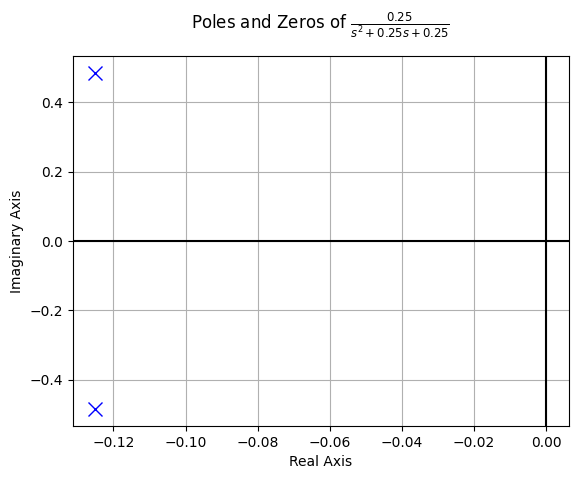

In [7]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

## Diagrama de Bode

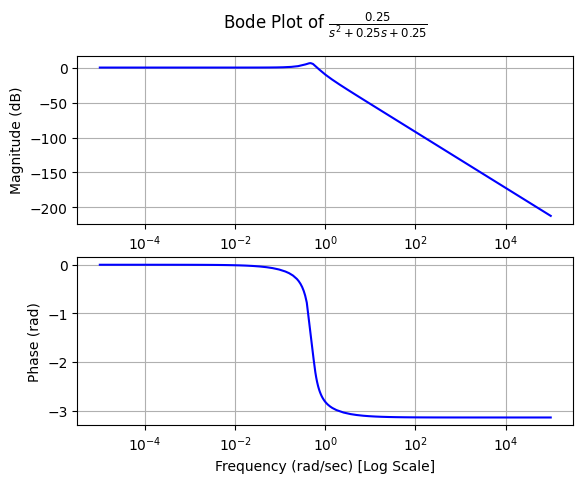

In [8]:
bode_plot(tf1)

## Respuesta impulso

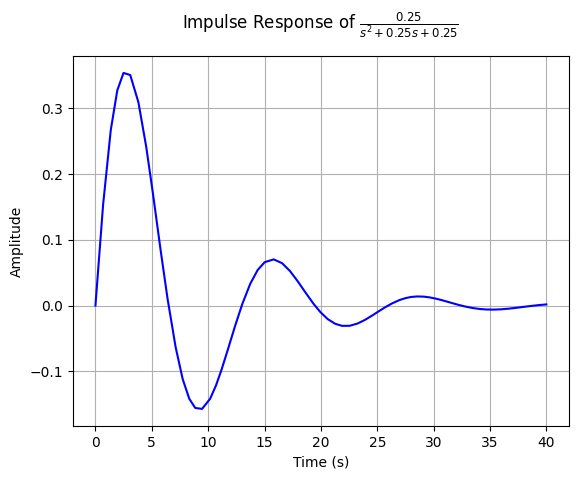

In [9]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

# Respuesta al escalón

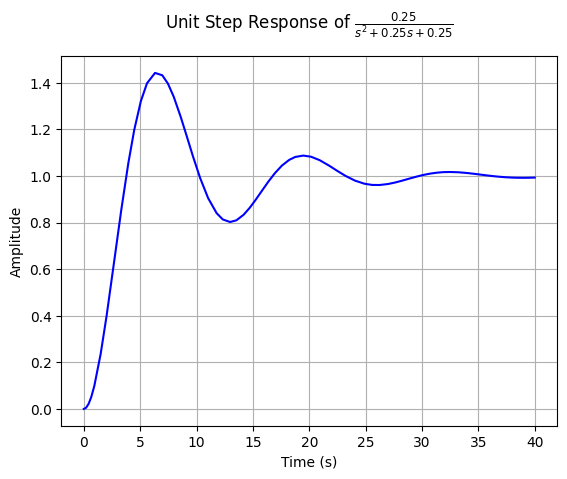

In [10]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

# Respuesta rampa

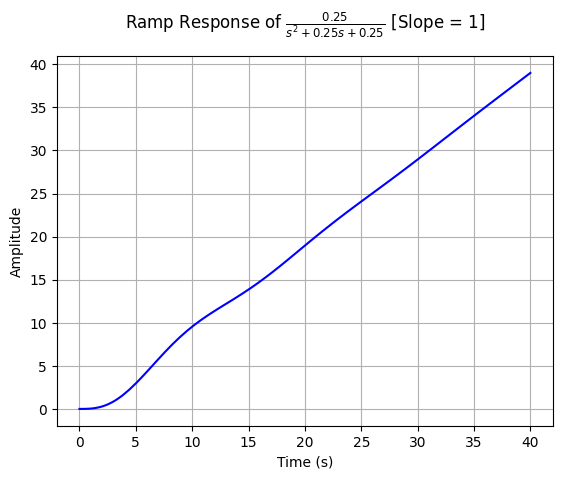

In [11]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

# Para un sistema sobreamortiguado

Ahora, para un sistema subamortiguado:

$$\xi>1$$

$$\frac{c}{2\sqrt{k m}}>1$$

Asumimos: $L = 10$, $R=2$, $C=0.4$ y calculamos los valores de m,c y k a partir de la tabla:


|                         | Circuito RLC | Péndulo elástico                          |
|-------------------------|------------------------------------|-------------------------------------------|
                            |
|                         | $CL$                              | $m$                                     |
|                         | $L/R$                              | $c$                                     |
|                         | $1$                    | $k$                           |

$$k=1$$

$$c=\frac{L}{R} = 5$$

$$m=CL = 4$$



$$\xi =\frac{5}{2\sqrt{1*4}}= \frac{5}{4}=1.25$$


In [12]:
#Reemplazando los valores
mck = {m: 4.0, c: 5.0, k: 1.0}
mck

{c: 5.0, k: 1.0, m: 4.0}

In [13]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*sym.sqrt(ao*a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

In [14]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                      _____________
                     ╱      2      
                    ╱      c       
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m                √m            

p1= -1.00000000000000
p2= -0.250000000000000
xi= 1.25000000000000
omega_n= 0.500000000000000


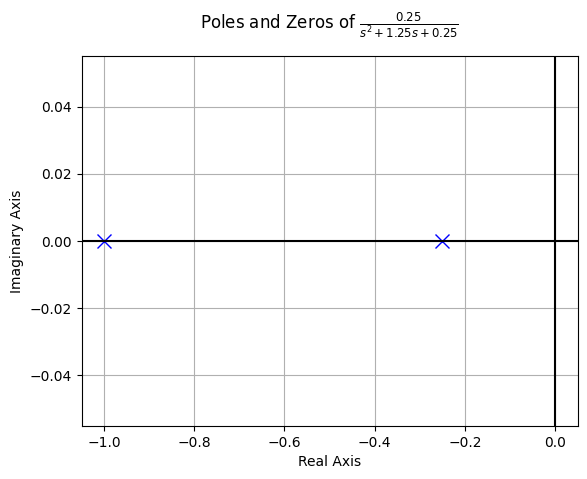

In [15]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

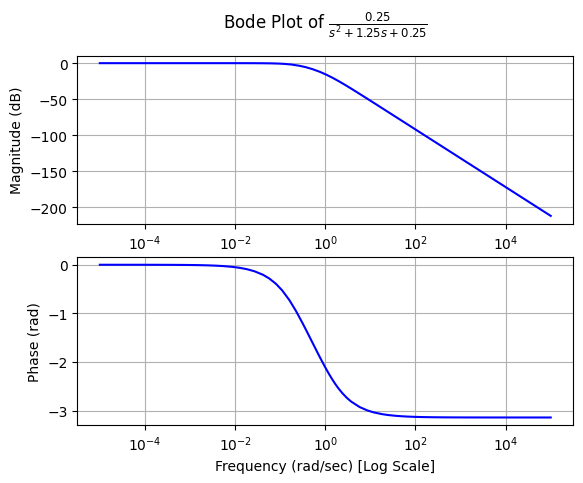

In [16]:
bode_plot(tf1)

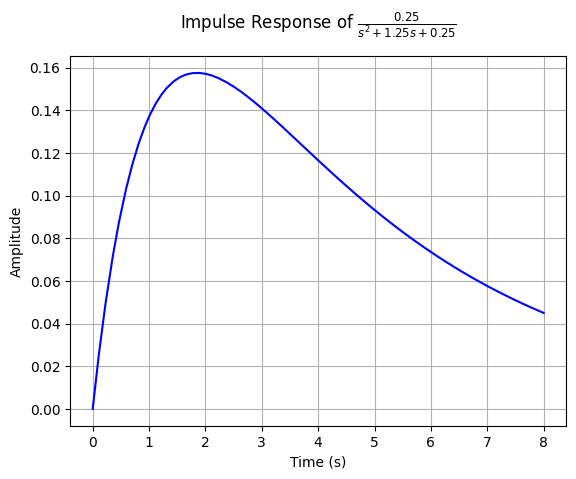

In [17]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

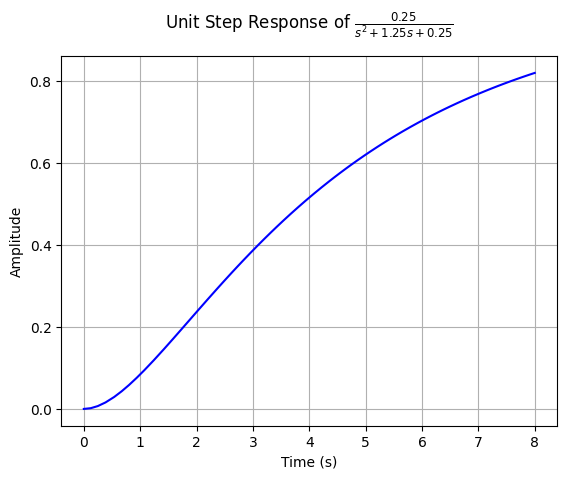

In [18]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

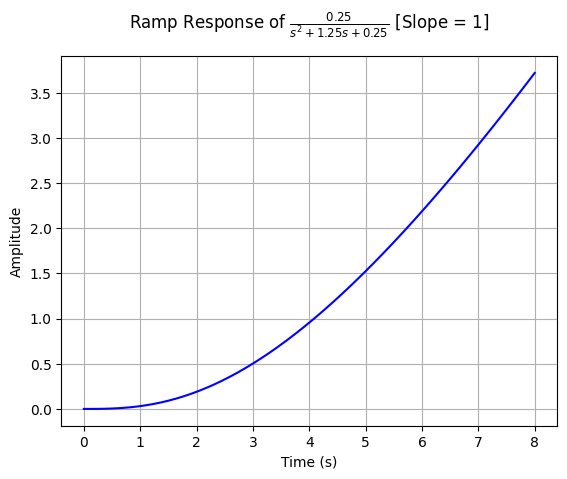

In [19]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

# Para un sistema de amortiguamiento crítico

Ahora, para un sistema de amortiguamiento crítico:

$$\xi=1$$

$$\frac{c}{2\sqrt{k m}}=1$$

Asumimos: $L = 8$, $R=2$, $C=0.5$ y calculamos los valores de m,c y k a partir de la tabla:


|                         | Circuito RLC | Péndulo elástico                          |
|-------------------------|------------------------------------|-------------------------------------------|
                            |
|                         | $CL$                              | $m$                                     |
|                         | $L/R$                              | $c$                                     |
|                         | $1$                    | $k$                           |

$$k=1$$

$$c=\frac{L}{R} = 4$$

$$m=CL = 4$$



$$\xi =\frac{4}{2\sqrt{1*4}}= 1$$


In [20]:
#Reemplazando los valores
mck = {m: 4.0, c: 4.0, k: 1.0}
mck

{c: 4.0, k: 1.0, m: 4.0}

In [21]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*sym.sqrt(ao*a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

In [22]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                      _____________
                     ╱      2      
                    ╱      c       
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m                √m            

p1= -0.500000000000000
p2= -0.500000000000000
xi= 1.00000000000000
omega_n= 0.500000000000000


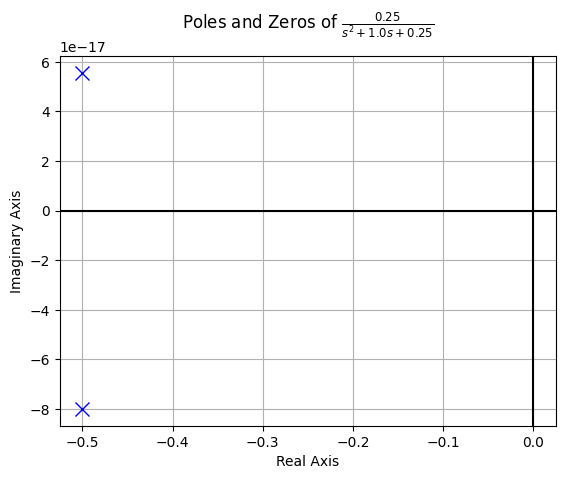

In [23]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

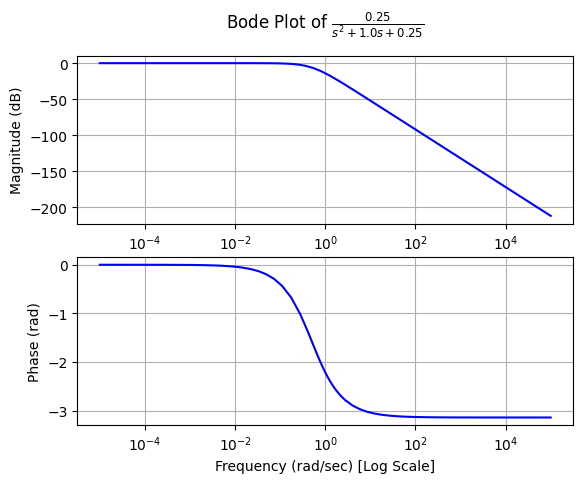

In [24]:
bode_plot(tf1)

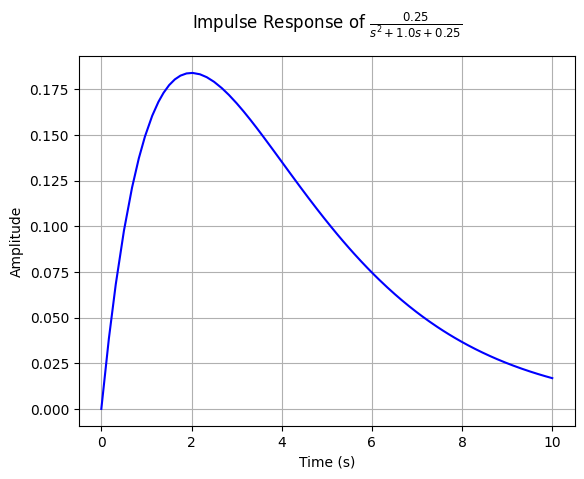

In [25]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

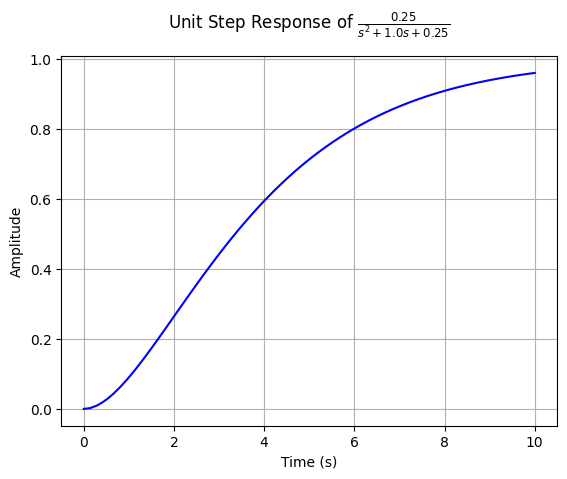

In [26]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

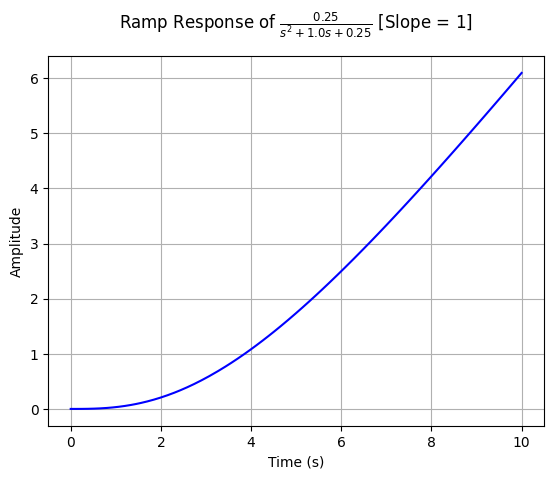

In [27]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#Función de transferencia para masa resorte amortiguado lazo cerrado

Teniendo en cuenta la forma canónica:

$$HLC(s)=\frac{1}{a_2s^2+a_1s+a_0}$$

$$HLC(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_ns+\omega_n^2}$$

In [28]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k+1 # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*a2*sym.sqrt(ao/a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

         1          
────────────────────
  ⎛c⋅s    2   k + 1⎞
m⋅⎜─── + s  + ─────⎟
  ⎝ m           m  ⎠

In [29]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                             ___________________
                            ╱         2         
                _______    ╱         c          
        1.0⋅ⅈ⋅╲╱ k + 1 ⋅  ╱   - ─────────── + 1 
   c                    ╲╱      4⋅m⋅(k + 1)     
- ─── + ────────────────────────────────────────
  2⋅m                      √m                   

Ahora, para sistema subamortiguado:

$$0<\xi<1$$

$$0<\frac{c}{2 m\sqrt{\frac{k+1} {m}}}<1$$

Asumimos:

$$c=1 = \frac{L}{R}$$

$L = 1$, $R=1$

$$k=1$$

$$m=4 = CL$$

$C=4$

$$\xi = \frac{\sqrt{2}}8 =0.17$$

In [30]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

## Polos y ceros

In [31]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.695970545353753*I
p2= -0.125 - 0.695970545353753*I
xi= 0.176776695296637
omega_n= 0.707106781186548


## Tiempo de Establecimiento:

In [32]:
t_s3 = 6*m / c
print('El tiempo de establecimiento es de: ',t_s3.subs(mck))

El tiempo de establecimiento es de:  24.0000000000000


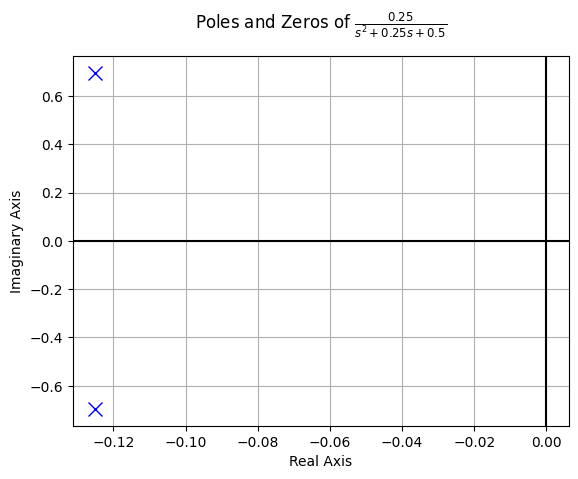

In [33]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf3 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf3)

## Diagrama de Bode

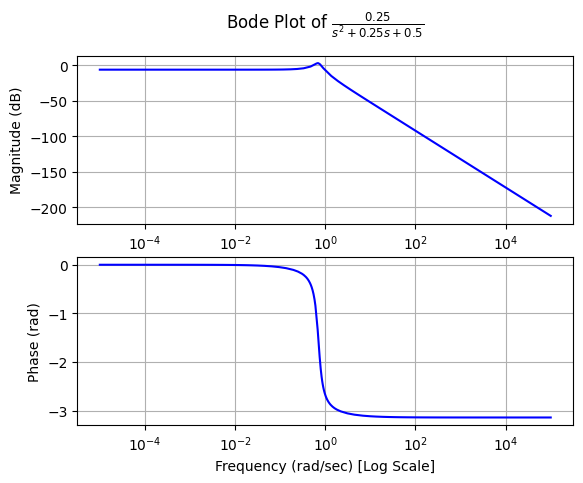

In [34]:
bode_plot(tf3)

## Respuesta impulso

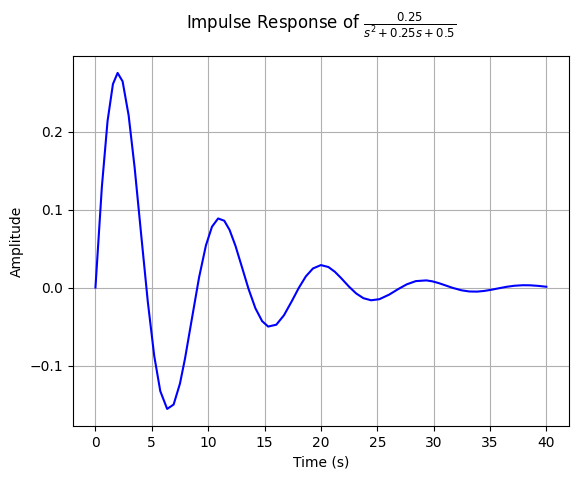

In [35]:
impulse_response_plot(tf3,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 2]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

2.262626262626263

# Respuesta al escalón

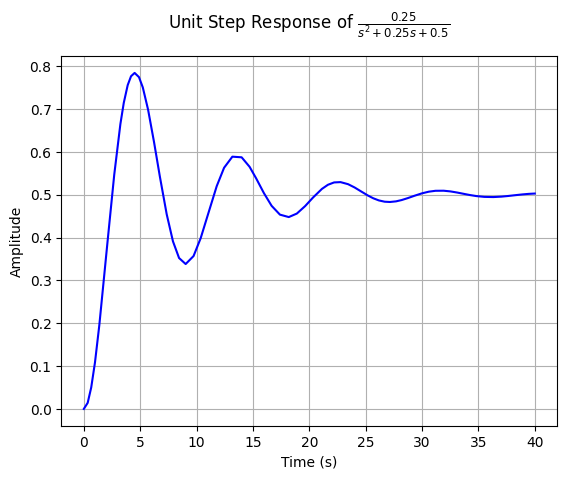

In [37]:
step_response_plot(tf3,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import step, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 2]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = step((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

4.525252525252526

## Respuesta Rampa

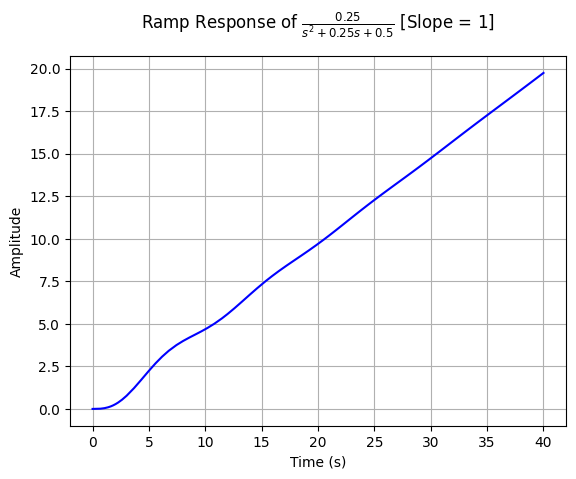

In [39]:
ramp_response_plot(tf3,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Ahora, para sistema de amortiguamiento crítico:

$$\xi=1$$

$$\frac{c}{2 m\sqrt{\frac{k+1} {m}}}=1$$

Asumimos:

$$c=4 = \frac{L}{R}$$

$L = 8$, $R=2$

$$k=1$$

$$m=2 = CL$$

$C=\frac{1}{4}$

$$\xi = \frac{4}{4}=1$$

In [40]:
#Reemplazando los valores
mck = {m: 2.0, c: 4.0, k: 1.0}
mck

{c: 4.0, k: 1.0, m: 2.0}

## Polos y ceros

In [41]:
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -1.00000000000000
p2= -1.00000000000000
xi= 1.00000000000000
omega_n= 1.00000000000000


## Tiempo de Establecimiento:

In [42]:
t_s4 = 6*m / c
print('El tiempo de establecimiento es de: ',t_s4.subs(mck))

El tiempo de establecimiento es de:  3.00000000000000


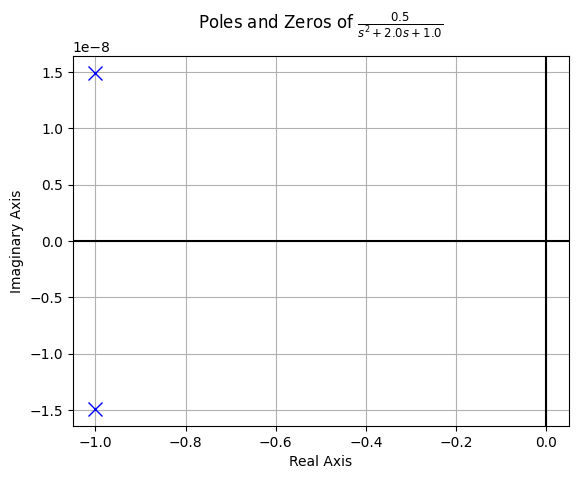

In [43]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot
num,den=sym.fraction(H.subs(mck))

tf4 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf4)

## Diagrama de Bode

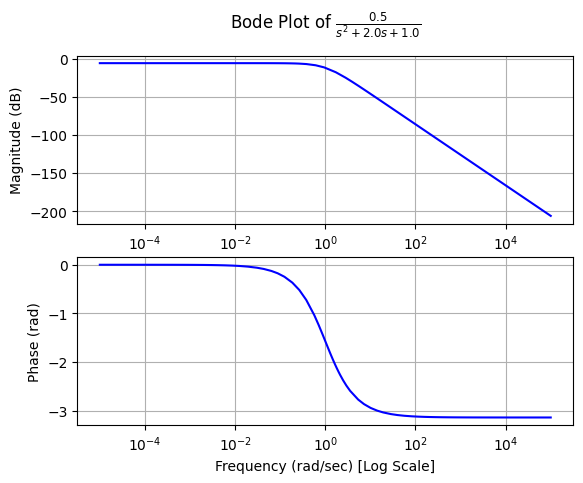

In [44]:
bode_plot(tf4)

## Respuesta impulso

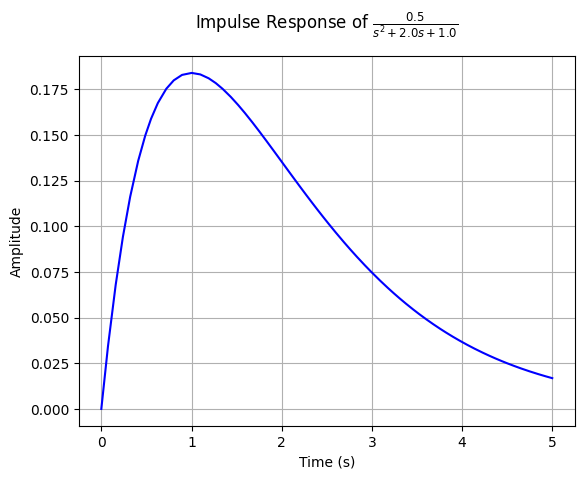

In [45]:
impulse_response_plot(tf4,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [2, 4, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

1.207045198818771

# Respuesta al escalón

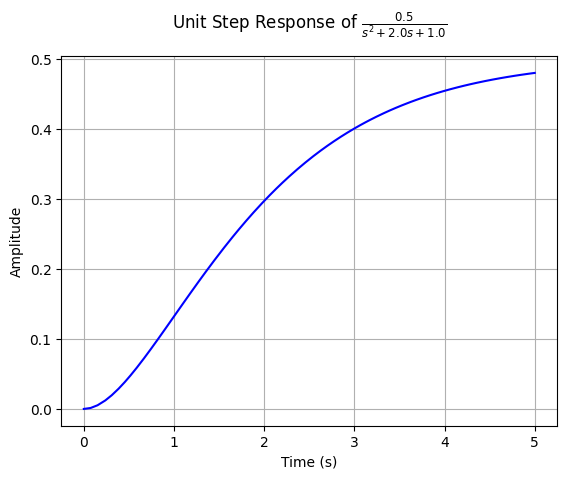

In [47]:
step_response_plot(tf4,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

## Respuesta Rampa

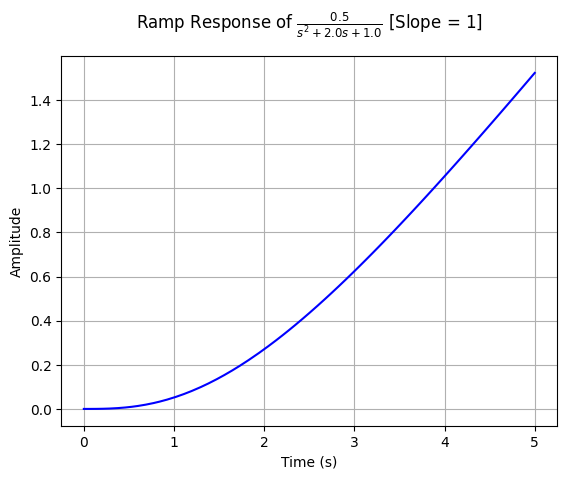

In [48]:
ramp_response_plot(tf4,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))